# Importar Principais Bibliotecas

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets

import numpy as np
import matplotlib.pyplot as plt

# Remover Imagens com formatos diferentes

In [46]:
#Inicio
import os
import cv2
import imghdr

In [47]:
directorio = 'data' 

In [48]:
#Todas as imagens do dataSet estao no formato "png"
extensao_img = ['png']

In [26]:
#Verficar se cada uma das imagens esta no formato "png", caso nao sera removida
for imagens in os.listdir(directorio): 
    for final_img in os.listdir(os.path.join(directorio, imagens)):
        caminho_img = os.path.join(directorio, imagens, final_img)
        img = cv2.imread(caminho_img)
        #Salvar a extensao da imagem em tipo
        tipo = imghdr.what(caminho_img)
        if tipo not in extensao_img: 
            print('Image is not png extension {}'.format(caminho_img))
            os.remove(caminho_img)

# Carregar os dados

In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [50]:
#Estabelecer o conjunto de dados(sem os rotulos que serao criados posteriormente)
data = tf.keras.utils.image_dataset_from_directory('data')

Found 601 files belonging to 4 classes.


In [51]:
#Garantir o acesso ao pipiline dos dados
data_count = data.as_numpy_iterator()

In [52]:
#batch e composto pelas imagens e rotulos
batch = data_count.next()

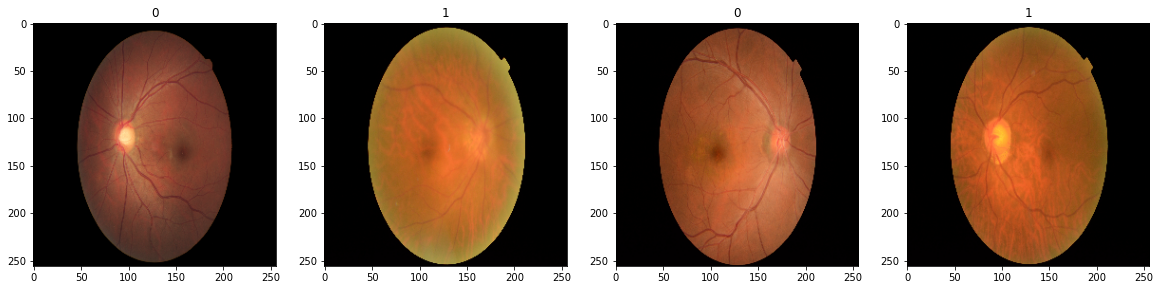

In [31]:
#Batches(normal, cataracta, glaucoma, retina)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

In [32]:
#Fim

# Pre processamento dos dados

Dividing our pixels images values by the maximium scale to be between 0 and 1 instead of 0 to 255, it will improve the model performance in time of train

x - imagens

y - labels(target variables)

In [53]:
data = data.map(lambda x,y: (x/255, y))

In [54]:
#pick up the first batch in the dataset
data.as_numpy_iterator().next()

(array([[[[0.0000000e+00, 2.7573531e-04, 0.0000000e+00],
          [1.5625000e-03, 1.5625000e-03, 1.5625000e-03],
          [3.9215689e-03, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
 
         [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [2.2365197e-03, 2.2365197e-03, 2.2365197e-03],
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [2.2365197e-03, 2.2365197e-03, 2.2365197e-03],
          [0.0000000e+00, 5.3921570e-03, 2.5428922e-03]],
 
         [[1.4705883e-03, 1.4705883e-03, 1.4705883e-03],
          [1.4705883e-03, 1.4705883e-03, 1.4705883e-03],
          [0.0000000e+00, 1.4705883e-03, 2.7573531e-04],
          ...,
          [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
          [0.0000000e+00, 0.0000000e+

# Dividir os Dados em Treino e Teste e Validacao

In [55]:
#Dividing the data into: 70% for train, 20% for validation, and 10% for test
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Exploracao dos dados

The pixel values range from: <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> to <TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


TypeError: 'TakeDataset' object is not subscriptable

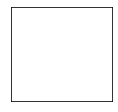

In [20]:
print("The pixel values range from:", np.min(train), "to" ,np.max(train))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train[i])
    plt.xlabel(class_names[train[i][0]])
plt.show()

# Modelo


1) Setup and configure a Functional API model

In [57]:
inputs = keras.Input(shape=(32,32,3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation = "softmax")(x) #used 'softmax'

model = keras.Model(inputs, outputs, name="toy_resnet")

Here's the complete architecture

In [58]:
model.summary(0)

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                         

Plot the model

In [59]:
!pip install pydot
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2) Compile the model

In [63]:
import tensorflow as tf

# Resize the input images to (32, 32)
train_resized = train.map(lambda x, y: (tf.image.resize(x, (32, 32)), y))
val_resized = val.map(lambda x, y: (tf.image.resize(x, (32, 32)), y))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_resized, validation_data=val_resized, epochs=20)

#model.compile(optimizer='adam',
#                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
#                metrics=['accuracy'])

Epoch 1/20
13/13 [==============================] - 26s 1s/step - loss: 1.3395 - accuracy: 0.4928 - val_loss: 1.2266 - val_accuracy: 0.5417
Epoch 2/20
13/13 [==============================] - 25s 1s/step - loss: 1.2954 - accuracy: 0.4832 - val_loss: 1.2337 - val_accuracy: 0.4792
Epoch 3/20
13/13 [==============================] - 26s 2s/step - loss: 1.2306 - accuracy: 0.5120 - val_loss: 1.3018 - val_accuracy: 0.4896
Epoch 4/20
13/13 [==============================] - 26s 2s/step - loss: 1.2085 - accuracy: 0.5288 - val_loss: 1.2868 - val_accuracy: 0.4792
Epoch 5/20
13/13 [==============================] - 25s 2s/step - loss: 1.2190 - accuracy: 0.5457 - val_loss: 1.0319 - val_accuracy: 0.6458
Epoch 6/20
13/13 [==============================] - 24s 1s/step - loss: 1.2307 - accuracy: 0.5144 - val_loss: 1.2115 - val_accuracy: 0.5104
Epoch 7/20
13/13 [==============================] - 24s 1s/step - loss: 1.1491 - accuracy: 0.5673 - val_loss: 1.2466 - val_accuracy: 0.4792
Epoch 8/20
13/13 [==

# Treinamento

1) Feed the model

In [77]:
history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))


Epoch 1/10


ValueError: in user code:

    File "C:\Users\Agostinho\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Agostinho\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Agostinho\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Agostinho\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Agostinho\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Agostinho\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "toy_resnet" "                 f"(type Functional).
    
    Input 0 of layer "conv2d_21" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (32,)
    
    Call arguments received by layer "toy_resnet" "                 f"(type Functional):
      • inputs=tf.Tensor(shape=(32,), dtype=string)
      • training=True
      • mask=None
